This dataset is taken from https://archive.ics.uci.edu/ml/datasets/Covertype
The task is to classify forest cover type

In [1]:
#Import the required modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cover=pd.read_csv('CoverType.csv')

In [3]:
#Shape of dataset
cover.shape

(200000, 55)

This dataset contains 200000 rows and 55 columns

### Exploratory Data analysis

#### Check for missing values


In [4]:
cover.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 55 columns):
Elevation                             200000 non-null int64
Aspect                                200000 non-null int64
Slope                                 200000 non-null int64
Horizontal_Distance_To_Hydrology      200000 non-null int64
Vertical_Distance_To_Hydrology        200000 non-null int64
Horizontal_Distance_To_Roadways       200000 non-null int64
Hillshade_9am                         200000 non-null int64
Hillshade_Noon                        200000 non-null int64
Hillshade_3pm                         200000 non-null int64
Horizontal_Distance_To_Fire_Points    200000 non-null int64
Wilderness_Area1                      200000 non-null int64
Wilderness_Area2                      200000 non-null int64
Wilderness_Area3                      200000 non-null int64
Wilderness_Area4                      200000 non-null int64
Soil_1                                200000 non-

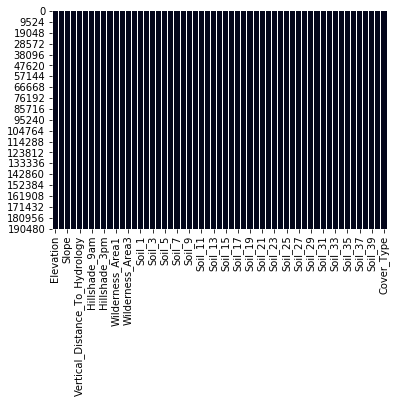

In [5]:
sns.heatmap(cover.isnull(),cbar=False)

#### This dataset has no missing values

In [6]:
#### Removing the columns based on correlation between variables

In [7]:
cover.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_32,Soil_33,Soil_34,Soil_35,Soil_36,Soil_37,Soil_38,Soil_39,Soil_40,Cover_Type
Elevation,1.000000,0.015201,-0.246062,0.304584,0.090849,0.366130,0.112858,0.208750,0.060658,0.150015,...,0.166663,0.068601,0.011375,0.084541,0.020745,0.035727,0.218257,0.192141,0.212582,-0.272373
Aspect,0.015201,1.000000,0.078561,0.016681,0.070825,0.027120,-0.579518,0.336940,0.648037,-0.110170,...,0.056785,0.019992,0.011614,-0.023226,0.002396,-0.019881,0.023032,0.006960,-0.005706,0.021436
Slope,-0.246062,0.078561,1.000000,-0.011956,0.272565,-0.216841,-0.328712,-0.527667,-0.174495,-0.186712,...,-0.135698,0.206899,-0.011325,-0.021069,0.002413,0.006063,-0.070942,0.095500,0.025464,0.150236
Horizontal_Distance_To_Hydrology,0.304584,0.016681,-0.011956,1.000000,0.604679,0.072864,-0.025489,0.045980,0.050822,0.053474,...,0.127966,0.095723,0.072146,-0.004082,0.032082,-0.004989,0.040788,0.031759,0.148597,-0.021031
Vertical_Distance_To_Hydrology,0.090849,0.070825,0.272565,0.604679,1.000000,-0.046129,-0.164813,-0.109505,0.035129,-0.069786,...,0.041347,0.162598,0.060576,-0.005628,0.013546,-0.007228,-0.009882,0.044544,0.182684,0.083458
Horizontal_Distance_To_Roadways,0.366130,0.027120,-0.216841,0.072864,-0.046129,1.000000,0.031807,0.190536,0.109030,0.331239,...,-0.089392,-0.082718,0.006719,-0.003669,0.007377,0.016687,0.080749,0.033059,0.015652,-0.152887
Hillshade_9am,0.112858,-0.579518,-0.328712,-0.025489,-0.164813,0.031807,1.000000,0.010082,-0.780224,0.133719,...,0.006831,-0.065148,0.007755,0.028630,0.007473,0.010047,0.013053,-0.028875,0.001392,-0.036385
Hillshade_Noon,0.208750,0.336940,-0.527667,0.045980,-0.109505,0.190536,0.010082,1.000000,0.594174,0.057234,...,0.126258,-0.084312,0.045423,0.004525,0.016237,-0.020556,0.042948,-0.071573,-0.038931,-0.096117
Hillshade_3pm,0.060658,0.648037,-0.174495,0.050822,0.035129,0.109030,-0.780224,0.594174,1.000000,-0.048776,...,0.083483,-0.022300,0.018408,-0.017820,0.001751,-0.019688,0.023491,-0.029771,-0.024872,-0.047626
Horizontal_Distance_To_Fire_Points,0.150015,-0.110170,-0.186712,0.053474,-0.069786,0.331239,0.133719,0.057234,-0.048776,1.000000,...,-0.089293,-0.058741,-0.034817,-0.002350,-0.010517,0.003936,-0.019051,-0.001246,0.007566,-0.108488


In [8]:
col_corr = set() # Set of all the names of deleted columns
corr_matrix = cover.corr().abs()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (corr_matrix.iloc[i, j] >= 0.50) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                cover.drop(colname,axis=1,inplace=True) # deleting the column from the dataset


In [9]:
cover.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Soil_1', 'Soil_2', 'Soil_3',
       'Soil_4', 'Soil_5', 'Soil_6', 'Soil_7', 'Soil_8', 'Soil_9', 'Soil_10',
       'Soil_11', 'Soil_12', 'Soil_13', 'Soil_14', 'Soil_15', 'Soil_16',
       'Soil_17', 'Soil_18', 'Soil_19', 'Soil_20', 'Soil_21', 'Soil_22',
       'Soil_23', 'Soil_24', 'Soil_25', 'Soil_26', 'Soil_27', 'Soil_28',
       'Soil_30', 'Soil_31', 'Soil_32', 'Soil_33', 'Soil_34', 'Soil_35',
       'Soil_36', 'Soil_37', 'Soil_38', 'Soil_39', 'Soil_40', 'Cover_Type'],
      dtype='object')

In [10]:
len(cover.columns)

48

##### The number of columns reduced from 55 to 48

### Feature Selection using chi square distribution

Chi square distribution is used to measure the degree of association between two categorical variables

In [11]:
X=cover[['Wilderness_Area1', 'Wilderness_Area2', 'Soil_1', 'Soil_2', 'Soil_3',
       'Soil_4', 'Soil_5', 'Soil_6', 'Soil_7', 'Soil_8', 'Soil_9', 'Soil_10',
       'Soil_11', 'Soil_12', 'Soil_13', 'Soil_14', 'Soil_15', 'Soil_16',
       'Soil_17', 'Soil_18', 'Soil_19', 'Soil_20', 'Soil_21', 'Soil_22',
       'Soil_23', 'Soil_24', 'Soil_25', 'Soil_26', 'Soil_27', 'Soil_28',
       'Soil_30', 'Soil_31', 'Soil_32', 'Soil_33', 'Soil_34', 'Soil_35',
       'Soil_36', 'Soil_37', 'Soil_38', 'Soil_39', 'Soil_40']]
y=cover['Cover_Type']

In [12]:
from sklearn.feature_selection import chi2
chi_scores=chi2(X,y)

In [13]:
chi_scores
#The first array represents the chi square statistic and second array represents p-values
#Higher the chi square value, lower the p value the feature is more important


(array([1.06431442e+04, 4.16849926e+03, 1.04023712e+04, 1.87009858e+04,
        2.13303851e+04, 2.21643813e+04, 5.19364219e+03, 1.58066290e+04,
        4.09196705e+01, 1.38546801e+01, 2.35161685e+02, 4.25426985e+04,
        2.36022589e+03, 7.46315190e+03, 3.72591825e+03, 4.41719590e+03,
        3.23722676e+01, 2.80706285e+02, 7.25572113e+03, 7.28362739e+02,
        4.78044968e+02, 3.92341879e+02, 4.87129771e+02, 8.54713499e+03,
        6.33329223e+03, 1.29790575e+03, 5.28966955e+01, 5.71580173e+02,
        8.53628996e+01, 2.67525354e+02, 4.27441645e+03, 1.25755528e+03,
        2.10971014e+03, 1.64023093e+03, 3.80621235e+02, 4.32518821e+03,
        2.58344762e+02, 2.86107484e+03, 2.26521267e+04, 2.07634893e+04,
        1.36406254e+04]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        3.00311004e-007, 3.13022694e-002, 6.05785559e-048, 0.00000000e+000,
        0.00000000e+000, 0

In [14]:
chi_values=pd.Series(chi_scores[0])
chi_values.index=X.columns
chi_values


Wilderness_Area1    10643.144183
Wilderness_Area2     4168.499263
Soil_1              10402.371194
Soil_2              18700.985755
Soil_3              21330.385113
Soil_4              22164.381310
Soil_5               5193.642186
Soil_6              15806.629035
Soil_7                 40.919670
Soil_8                 13.854680
Soil_9                235.161685
Soil_10             42542.698481
Soil_11              2360.225888
Soil_12              7463.151903
Soil_13              3725.918250
Soil_14              4417.195895
Soil_15                32.372268
Soil_16               280.706285
Soil_17              7255.721134
Soil_18               728.362739
Soil_19               478.044968
Soil_20               392.341879
Soil_21               487.129771
Soil_22              8547.134989
Soil_23              6333.292229
Soil_24              1297.905750
Soil_25                52.896696
Soil_26               571.580173
Soil_27                85.362900
Soil_28               267.525354
Soil_30   

In [15]:
chi_values.sort_values(ascending=False)


Soil_10             42542.698481
Soil_38             22652.126726
Soil_4              22164.381310
Soil_3              21330.385113
Soil_39             20763.489339
Soil_2              18700.985755
Soil_6              15806.629035
Soil_40             13640.625386
Wilderness_Area1    10643.144183
Soil_1              10402.371194
Soil_22              8547.134989
Soil_12              7463.151903
Soil_17              7255.721134
Soil_23              6333.292229
Soil_5               5193.642186
Soil_14              4417.195895
Soil_35              4325.188211
Soil_30              4274.416446
Wilderness_Area2     4168.499263
Soil_13              3725.918250
Soil_37              2861.074840
Soil_11              2360.225888
Soil_32              2109.710141
Soil_33              1640.230934
Soil_24              1297.905750
Soil_31              1257.555280
Soil_18               728.362739
Soil_26               571.580173
Soil_21               487.129771
Soil_19               478.044968
Soil_20   

In [16]:
 #Dropping last 15 unimportant columns
cover.drop(columns=['Soil_18','Soil_26','Soil_21','Soil_19','Soil_20','Soil_34','Soil_16','Soil_28','Soil_36','Soil_9','Soil_27',
                       'Soil_25','Soil_7','Soil_15','Soil_8'],inplace=True)



In [17]:
cover.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Soil_1', 'Soil_2', 'Soil_3',
       'Soil_4', 'Soil_5', 'Soil_6', 'Soil_10', 'Soil_11', 'Soil_12',
       'Soil_13', 'Soil_14', 'Soil_17', 'Soil_22', 'Soil_23', 'Soil_24',
       'Soil_30', 'Soil_31', 'Soil_32', 'Soil_33', 'Soil_35', 'Soil_37',
       'Soil_38', 'Soil_39', 'Soil_40', 'Cover_Type'],
      dtype='object')

In [18]:
len(cover.columns)

33

#### Feature Selection using ANOVA Test

ANOVA is a popular feature selection techniques that can be used for numerical input data and a categorical (class) target variable. ANOVA
is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more
samples of data (often three or more) come from the same distribution or not

In [19]:
from statsmodels.formula.api import ols
#Performing ANOVA test between each categorical variable and target variable
mod = ols('Cover_Type ~ Elevation+Aspect+Slope+Horizontal_Distance_To_Hydrology+Horizontal_Distance_To_Roadways+Horizontal_Distance_To_Fire_Points', data=cover).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)

<IPython.core.display.Javascript object>

In [20]:
aov_table

,sum_sq,df,F,PR(>F)
Elevation,19128.638038,1.0,10802.836162,0.000000e+00
Aspect,78.131693,1.0,44.124619,3.089056e-11
Slope,1763.777815,1.0,996.087788,4.391222e-218
Horizontal_Distance_To_Hydrology,1352.292526,1.0,763.702809,8.721898e-168
Horizontal_Distance_To_Roadways,335.276628,1.0,189.346386,4.620176e-43
Horizontal_Distance_To_Fire_Points,764.415326,1.0,431.701071,8.752853e-96
Residual,354128.642670,199993.0,NaN,NaN


In [21]:
aov_table[aov_table['PR(>F)'] >0.05]

,sum_sq,df,F,PR(>F)


In [22]:
#If PR value is greater than significance value 0.05 , drop that column
#Pr > F – This is the p-value associated with the F statistic of a given source


Here the PR(>F) value of all variables <0.05, hence we are not dropping any columns

#### Data Visualisation

C:\Users\devs2\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


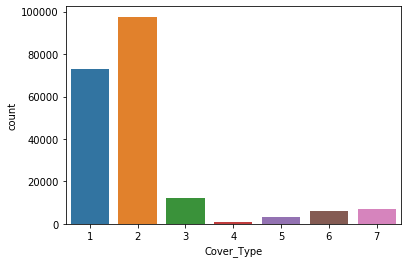

In [23]:
##To check teh distribution of target variable which is Cover_Type
sns.countplot(cover['Cover_Type'])

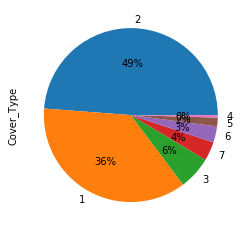

In [24]:

cover['Cover_Type'].value_counts().plot(kind='pie',autopct='%1.0f%%')

There are 7 classes in target variable, Class 1 and 2 covers most of the data distribution

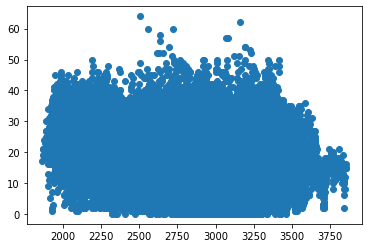

In [25]:
plt.scatter(cover['Elevation'],cover['Slope'])

Inference: We could not find any correlation between Elevation and Slope

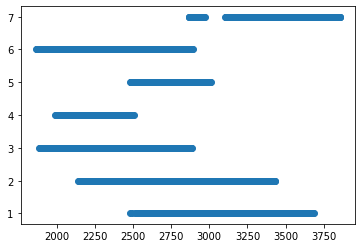

In [26]:
plt.scatter(cover['Elevation'],cover['Cover_Type'])

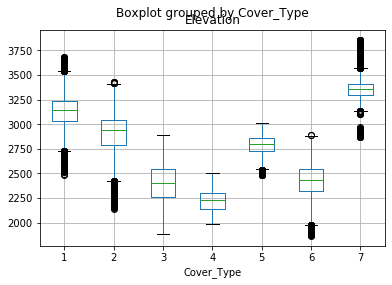

In [27]:
cover.boxplot(by='Cover_Type',column=['Elevation'])

Inference: Compared the distribution of Elevation with Cover_Type to understand if the interval of Elevation values directly matches with the cover_type but there are overlapping intervals

In [28]:
cover.columns


Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Soil_1', 'Soil_2', 'Soil_3',
       'Soil_4', 'Soil_5', 'Soil_6', 'Soil_10', 'Soil_11', 'Soil_12',
       'Soil_13', 'Soil_14', 'Soil_17', 'Soil_22', 'Soil_23', 'Soil_24',
       'Soil_30', 'Soil_31', 'Soil_32', 'Soil_33', 'Soil_35', 'Soil_37',
       'Soil_38', 'Soil_39', 'Soil_40', 'Cover_Type'],
      dtype='object')

In [29]:
### Splitting the input features and target variable

In [30]:
y=cover['Cover_Type']


In [31]:
x=cover.drop(columns=['Cover_Type'])

In [32]:
# Spliting arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=42)

In [33]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier

In [34]:
clf = RandomForestClassifier(n_estimators = 100) 

In [35]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

In [37]:
# metrics are used to find accuracy or error
from sklearn import metrics 

 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.93726


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[16790,  1295,     2,     0,     5,     0,    46],
       [  747, 23402,    81,     0,    38,    48,    11],
       [    1,    83,  2958,    13,     1,    89,     0],
       [    0,     0,    29,   195,     0,    11,     0],
       [    8,   208,    11,     0,   594,     4,     0],
       [    0,    59,   180,    10,     1,  1325,     0],
       [  143,    13,     0,     0,     0,     0,  1599]], dtype=int64)

In [39]:
# Finding precision and recall
from sklearn.metrics import precision_score, recall_score
print("Precision:",precision_score(y_test, y_pred,average='micro'))
print("Recall:",recall_score(y_test, y_pred,average='micro'))

Precision: 0.93726
Recall: 0.93726


In [ ]:
#micro-averaging in a multiclass setting with all labels included will produce equal precision, recall and F

In [41]:

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.93      0.94     18138
           2       0.93      0.96      0.95     24327
           3       0.91      0.94      0.92      3145
           4       0.89      0.83      0.86       235
           5       0.93      0.72      0.81       825
           6       0.90      0.84      0.87      1575
           7       0.97      0.91      0.94      1755

    accuracy                           0.94     50000
   macro avg       0.93      0.88      0.90     50000
weighted avg       0.94      0.94      0.94     50000



We could see the class 4,5,6 having less recall and f1-score which is due to the data imbalance in the dataset. This is can be resolved by class weight technique.

In [42]:
#Lets check the distribution of classes
y_train.value_counts()

2    73271
1    54768
3     9166
7     5260
6     4418
5     2410
4      707
Name: Cover_Type, dtype: int64

##Adding class_weight=balanced
Class weights modify the loss function directly by giving a penalty to the classes with different weights. 
It means purposely increasing the power of the minority class and reducing the power of the majority class.

In [44]:
clf = RandomForestClassifier(n_estimators = 100,class_weight='balanced') 
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [45]:
y_pred = clf.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.93      0.94     18138
           2       0.94      0.96      0.95     24327
           3       0.91      0.94      0.93      3145
           4       0.89      0.84      0.86       235
           5       0.93      0.71      0.80       825
           6       0.89      0.84      0.87      1575
           7       0.97      0.91      0.94      1755

    accuracy                           0.94     50000
   macro avg       0.93      0.88      0.90     50000
weighted avg       0.94      0.94      0.94     50000



There is no much increase in the recall value of the classes. There is a slight increase in the recall value of Class 5

